<a href="https://colab.research.google.com/github/ibrahimhan07/DataMBG/blob/Code/Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labeling Analisis Sentimen
Tahap ini adalah salah satu tahap krusial bisa dilakukan secara manual atau otomatis menggunakan Lexicon

Alat ini berguna khusus untuk mengolah teks dalam Bahasa Indonesia

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


Alat ini membantu menyiapkan data (seperti teks atau gambar) agar siap diolah oleh program yang lebih canggih, misalnya untuk analisis sentimen ini

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


Kode ini memungkinkan Anda untuk mengunggah file dari komputer Anda ke lingkungan kerja di sini (Google Colab). Saat kode ini dijalankan, akan muncul tombol untuk memilih file yang ingin Anda unggah

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import csv



*   pandas as pd: bekerja dengan data dalam bentuk tabel, seperti data di file .csv Anda. Kita singkat namanya jadi pd biar lebih mudah dipanggil.
*   matplotlib.pyplot as plt: membuat gambar atau grafik dari data Anda, misalnya pie chart yang Anda buat nanti. Kita singkat namanya jadi plt.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Memanggil file csv yang sudah diunggah melalui pandas

In [ ]:
df = pd.read_csv('MBG1.csv', encoding='latin1')

In [ ]:
df.head()

,Text
0,Makanan bergizi gratis jangan sampai disunat B...
1,Buzzer seperti kamu tidak pernah tahu dan tida...
2,Oh mungkin lagi buru-buru mau ke acara kasi ma...
3,Tak Perlu Program Makan Gratis Bergizi Jika Ha...
4,Program Makan Bergizi Gratis Manfaat bagi Sisw...


In [ ]:
df.shape

(10001, 1)

#**Labelling**
Membuat dua kamus untuk menentukan kata itu berisi kata positif atau negatif

In [ ]:
import csv
# Pembuatan Kamus Lexicon
lexicon_positive = {}
with open('positive.tsv', 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        if len(row) > 1 and row[1].lstrip('-').isdigit():
            lexicon_positive[row[0]] = int(row[1])

lexicon_negative = {}
with open('negative.tsv', 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        if len(row) > 1 and row[1].lstrip('-').isdigit():
            lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    words = text.split()
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score -= abs(lexicon_negative[word])  # Mengurangkan bobot negatif
    return score

Kode ini mengambil sebuah kalimat, melihat kata per kata, lalu menghitung total skor sentimennya berdasarkan "kamus positif" dan "kamus negatif" yang sudah dibuat.

In [ ]:
df['compound'] = df['Text'].apply(sentiment_analysis_lexicon_indonesia)

df['polarity'] = df['compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')) #kode untuk label positive negative saja ( .apply(lambda score: 'positive' if score > 0 else ('negative')) )

print(df['polarity'].value_counts())

polarity
positive    5009
negative    3550
neutral     1442
Name: count, dtype: int64


In [ ]:
df.head(20)

,Text,compound,polarity
0,Makanan bergizi gratis jangan sampai disunat B...,-4,negative
1,Buzzer seperti kamu tidak pernah tahu dan tida...,-14,negative
2,Oh mungkin lagi buru-buru mau ke acara kasi ma...,-3,negative
3,Tak Perlu Program Makan Gratis Bergizi Jika Ha...,0,neutral
4,Program Makan Bergizi Gratis Manfaat bagi Sisw...,-2,negative
5,Makan bergizi gratis mega peluang semua pihak ...,-2,negative
6,Makan gratis apa makan bergizi kalo gratis sia...,1,positive
7,Keren banget Semoga program makan bergizi grat...,0,neutral
8,inimah harusnya sarapan bergizi gratis bukan m...,5,positive
9,ya berarti naikin harga rokok sidak tuh yang p...,2,positive


Kode ini menyimpan kembali "kotak data" df yang sekarang sudah ada kolom 'compound' dan 'polarity' ke dalam file baru bernama MBGClean.csv. index=False artinya nomor baris tidak ikut disimpan ke dalam file.

In [ ]:
df.to_csv("MBGLabeling1.csv", index = False)

In [ ]:
text = pd.read_csv("MBGLabeling1.csv")

In [ ]:
text.shape

(10001, 3)

In [ ]:
text.head()

,Text,compound,polarity
0,Makanan bergizi gratis jangan sampai disunat B...,-4,negative
1,Buzzer seperti kamu tidak pernah tahu dan tida...,-14,negative
2,Oh mungkin lagi buru-buru mau ke acara kasi ma...,-3,negative
3,Tak Perlu Program Makan Gratis Bergizi Jika Ha...,0,neutral
4,Program Makan Bergizi Gratis Manfaat bagi Sisw...,-2,negative


Kode ini membuat grafik lingkaran (pie chart) untuk menunjukkan perbandingan jumlah kalimat yang berlabel 'positive', 'negative', dan 'neutral' berdasarkan kolom 'polarity' di "kotak data" text. Grafik ini akan menampilkan persentase masing-masing label.

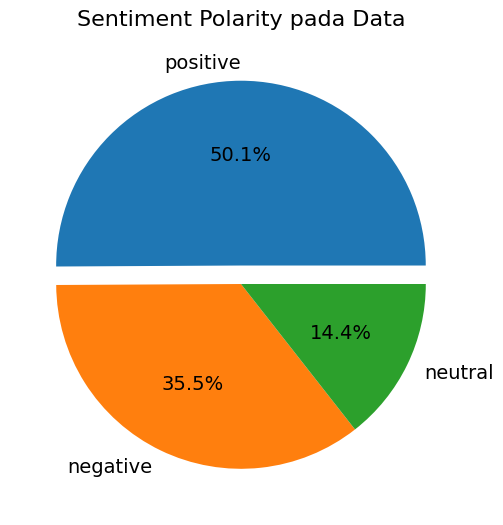

In [ ]:
# Visualisasi

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in text['polarity'].value_counts()]
labels = list(text['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity pada Data', fontsize = 16, pad = 20)
plt.show()